Bagian 3: Data Pre-processing
Gunakan sel ini untuk membersihkan data dan menyiapkan fitur.

✅ Libraries imported successfully!
📂 Loading data and models...
✅ Data loaded: (768, 9)
✅ Model loaded: RandomForestClassifier
✅ Features: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age
📊 Test set size: (154, 8)
📈 Positive cases in test: 54 (35.1%)

📋 MODEL PERFORMANCE SUMMARY
   Metric    Value                   Description
 Accuracy 0.740260           Overall correctness
Precision 0.659091  Correct positive predictions
   Recall 0.537037       True positives detected
 F1-Score 0.591837 Balance of precision & recall


🎯 CONFUSION MATRIX ANALYSIS
True Negatives (TN): 85 - Correct non-diabetic predictions
False Positives (FP): 15 - Non-diabetic predicted as diabetic
False Negatives (FN): 25 - Diabetic predicted as non-diabetic
True Positives (TP): 29 - Correct diabetic predictions

📈 Rates:
  • Accuracy: 74.0%
  • Misclassification: 26.0%
  • True Positive Rate (Sensitivity): 53.7%
  • False Positive Rate: 15.0%
  • Precision: 65.9%


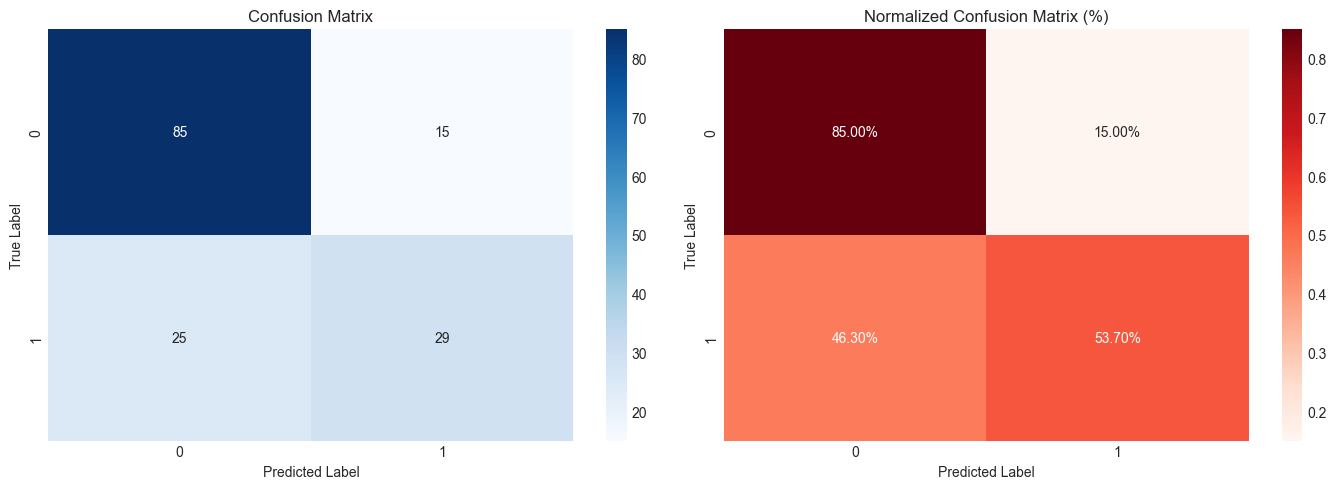


🔍 FEATURE IMPORTANCE ANALYSIS

Top 5 Most Important Features:
                 Feature  Importance
                 Glucose    0.316495
                     BMI    0.176100
                     Age    0.113591
DiabetesPedigreeFunction    0.112421
                 Insulin    0.079405


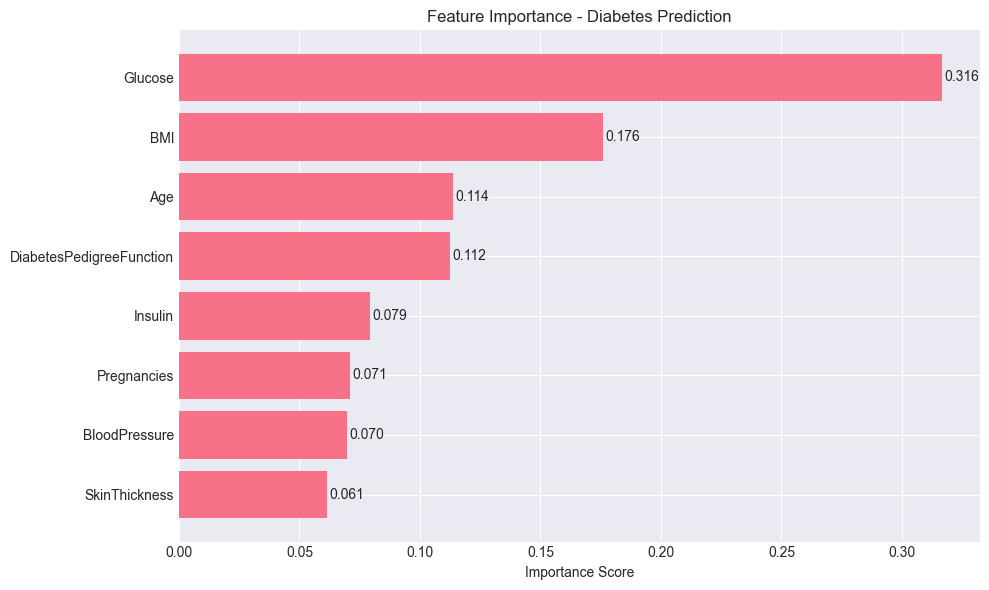


🧠 SHAP ANALYSIS (Model Interpretation)


<Figure size 1000x600 with 0 Axes>

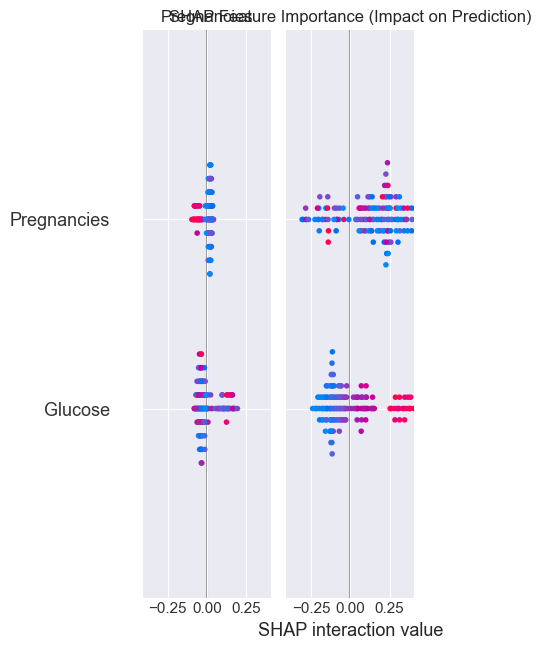


🔎 SHAP Force Plot for First Test Sample:
True Label: 0 | Predicted: 1
⚠️ SHAP analysis skipped: matplotlib = True is not yet supported for force plots with multiple samples!

📈 PARTIAL DEPENDENCE ANALYSIS


<Figure size 1200x400 with 0 Axes>

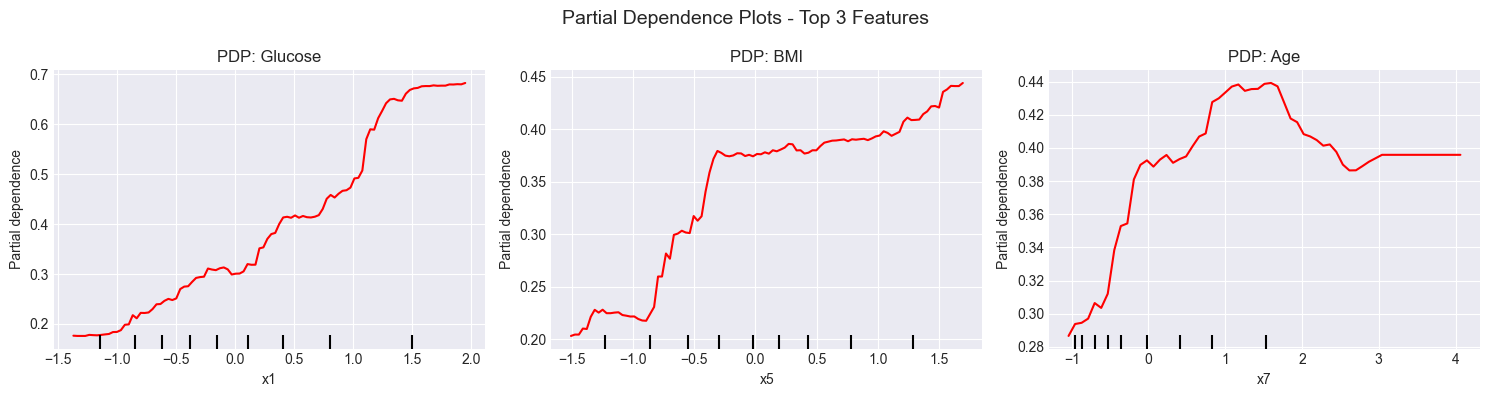


📊 ROC & PRECISION-RECALL ANALYSIS


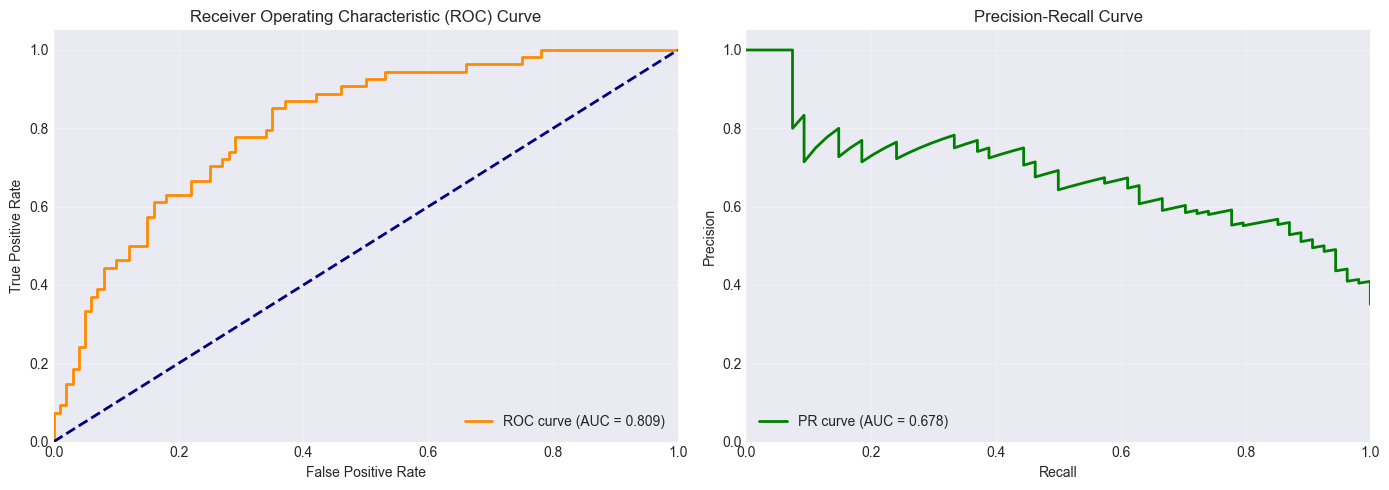

✅ ROC AUC: 0.809
✅ Precision-Recall AUC: 0.678

⚖️ THRESHOLD ANALYSIS
📌 Default threshold: 0.5
🎯 Optimal threshold (Youden's J): 0.276
📊 At optimal threshold:
   • True Positive Rate: 85.2%
   • False Positive Rate: 35.0%
   • Youden's J: 0.502

📈 Performance Comparison:
     Threshold  Accuracy  Precision   Recall  F1-Score
 0.5 (Default)  0.740260   0.659091 0.537037  0.591837
0.28 (Optimal)  0.720779   0.567901 0.851852  0.681481

🔎 ERROR ANALYSIS
Total misclassified: 40 (26.0%)

📊 Error Type Distribution:
Error_Type
False Negative    25
False Positive    15

📈 Feature Statistics for Error Types:

False Negative (n=25):
  • Glucose: -0.1 (avg)
  • BMI: -0.1 (avg)
  • Age: 0.0 (avg)

False Positive (n=15):
  • Glucose: 1.1 (avg)
  • BMI: 0.6 (avg)
  • Age: 0.3 (avg)

💡 BUSINESS INSIGHTS & RECOMMENDATIONS

🔑 KEY RISK FACTORS IDENTIFIED:
                   Factor Risk_Ratio Prevalence                   Recommendation
High Glucose (>140 mg/dL)       nanx       0.0% Monitor glucose level

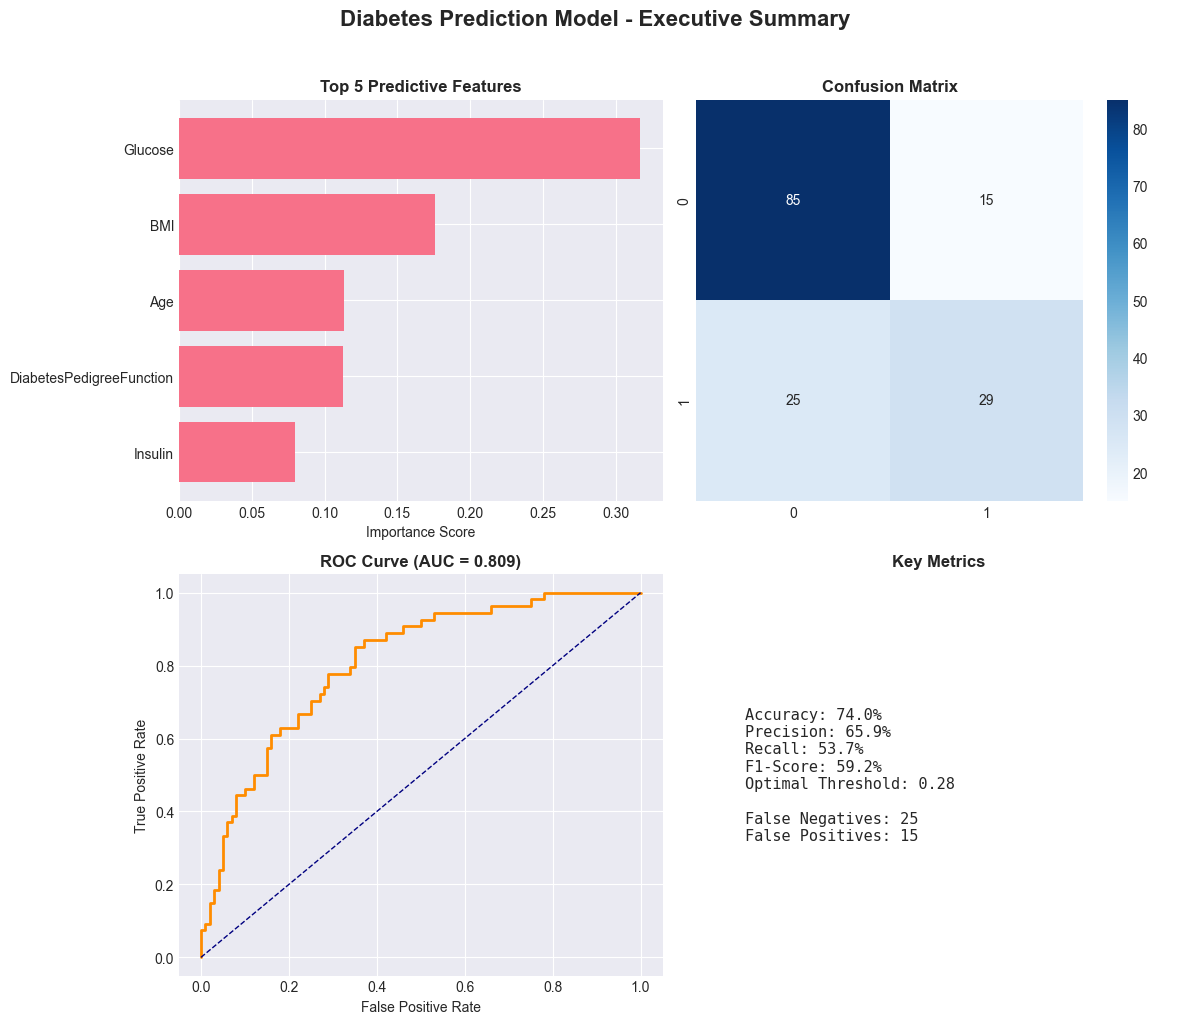

✅ Executive summary saved to: ../reports/executive_summary.png

💾 SAVING ANALYSIS RESULTS FOR APPLICATION
✅ Interpretation artifacts saved to: ../models/interpretation_artifacts.pkl

🎉 INTERPRETATION NOTEBOOK COMPLETED SUCCESSFULLY!

Generated Files:
1. ../reports/confusion_matrix_analysis.png
2. ../reports/feature_importance.png
3. ../reports/shap_summary.png
4. ../reports/partial_dependence_plots.png
5. ../reports/roc_pr_curves.png
6. ../reports/executive_summary.png
7. ../reports/model_interpretation_report.txt
8. ../models/interpretation_artifacts.pkl


In [3]:
# --- CELL 1: Setup & Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import shap
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_curve, auc, precision_recall_curve, f1_score,
    ConfusionMatrixDisplay, RocCurveDisplay, precision_score, recall_score
)
from sklearn.inspection import PartialDependenceDisplay
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✅ Libraries imported successfully!")

# --- CELL 2: Load Data & Models ---
print("📂 Loading data and models...")

# Load cleaned data
df_clean = pd.read_csv('../data/processed/diabetes_cleaned.csv')
X = df_clean.drop('Outcome', axis=1)
y = df_clean['Outcome']

# Load trained model and preprocessor
model_data = joblib.load('../models/best_model.pkl')
preprocessor = joblib.load('../models/preprocessing.pkl')

# Extract model and scaler
model = model_data['model']
scaler = preprocessor['scaler']
feature_names = preprocessor['feature_names']

print(f"✅ Data loaded: {df_clean.shape}")
print(f"✅ Model loaded: {type(model).__name__}")
print(f"✅ Features: {', '.join(feature_names)}")

# --- CELL 3: Prepare Test Data ---
from sklearn.model_selection import train_test_split

# Split data (gunakan random_state yang sama dengan training)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
X_test_scaled = scaler.transform(X_test)
X_train_scaled = scaler.transform(X_train)

# Predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

print(f"📊 Test set size: {X_test.shape}")
print(f"📈 Positive cases in test: {y_test.sum()} ({y_test.mean():.1%})")

# --- CELL 4: Performance Metrics Summary ---
print("\n" + "="*50)
print("📋 MODEL PERFORMANCE SUMMARY")
print("="*50)

# Gunakan nama variabel yang berbeda untuk menghindari conflict
acc = float(accuracy_score(y_test, y_pred))
prec = float(precision_score(y_test, y_pred, zero_division=0))
rec = float(recall_score(y_test, y_pred, zero_division=0))
f1_val = float(f1_score(y_test, y_pred, zero_division=0))

# Untuk menghindari error jika ada NaN
if pd.isna(prec):
    prec = 0.0
if pd.isna(rec):
    rec = 0.0
if pd.isna(f1_val):
    f1_val = 0.0

metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Value': [acc, prec, rec, f1_val],
    'Description': [
        'Overall correctness',
        'Correct positive predictions',
        'True positives detected',
        'Balance of precision & recall'
    ]
})

print(metrics_df.to_string(index=False))
print("\n" + "="*50)

# --- CELL 5: Confusion Matrix with Insights ---
print("\n🎯 CONFUSION MATRIX ANALYSIS")
print("="*50)

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Calculate rates
total = cm.sum()
accuracy_rate = (tp + tn) / total
misclassification_rate = (fp + fn) / total
true_positive_rate = tp / (tp + fn) if (tp + fn) > 0 else 0
false_positive_rate = fp / (fp + tn) if (fp + tn) > 0 else 0
precision_rate = tp / (tp + fp) if (tp + fp) > 0 else 0

print(f"True Negatives (TN): {tn} - Correct non-diabetic predictions")
print(f"False Positives (FP): {fp} - Non-diabetic predicted as diabetic")
print(f"False Negatives (FN): {fn} - Diabetic predicted as non-diabetic")
print(f"True Positives (TP): {tp} - Correct diabetic predictions")
print(f"\n📈 Rates:")
print(f"  • Accuracy: {accuracy_rate:.1%}")
print(f"  • Misclassification: {misclassification_rate:.1%}")
print(f"  • True Positive Rate (Sensitivity): {true_positive_rate:.1%}")
print(f"  • False Positive Rate: {false_positive_rate:.1%}")
print(f"  • Precision: {precision_rate:.1%}")

# Visualize Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')

# Normalized Confusion Matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Reds', ax=axes[1])
axes[1].set_title('Normalized Confusion Matrix (%)')
axes[1].set_ylabel('True Label')
axes[1].set_xlabel('Predicted Label')

plt.tight_layout()
plt.savefig('../reports/confusion_matrix_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# --- CELL 6: Feature Importance Analysis ---
print("\n🔍 FEATURE IMPORTANCE ANALYSIS")
print("="*50)

# Get feature importances
if hasattr(model, 'feature_importances_'):
    importances = model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    print("\nTop 5 Most Important Features:")
    print(feature_importance_df.head().to_string(index=False))
    
    # Visualize Feature Importance
    plt.figure(figsize=(10, 6))
    bars = plt.barh(feature_importance_df['Feature'], 
                    feature_importance_df['Importance'])
    plt.xlabel('Importance Score')
    plt.title('Feature Importance - Diabetes Prediction')
    plt.gca().invert_yaxis()
    
    # Add value labels
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.001, bar.get_y() + bar.get_height()/2,
                f'{width:.3f}', ha='left', va='center')
    
    plt.tight_layout()
    plt.savefig('../reports/feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()

# --- CELL 7: SHAP Analysis for Model Interpretation ---
print("\n🧠 SHAP ANALYSIS (Model Interpretation)")
print("="*50)

try:
    # Initialize SHAP explainer
    explainer = shap.TreeExplainer(model)
    
    # Calculate SHAP values
    shap_values = explainer.shap_values(X_test_scaled)
    
    # For binary classification
    if isinstance(shap_values, list):
        shap_values = shap_values[1]  # Use values for class 1
    
    # Summary plot
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values, X_test_scaled, 
                     feature_names=feature_names,
                     show=False)
    plt.title('SHAP Feature Importance (Impact on Prediction)')
    plt.tight_layout()
    plt.savefig('../reports/shap_summary.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Force plot for first prediction
    print("\n🔎 SHAP Force Plot for First Test Sample:")
    print(f"True Label: {y_test.iloc[0]} | Predicted: {y_pred[0]}")
    
    plt.figure(figsize=(12, 4))
    shap.force_plot(explainer.expected_value[1], shap_values[0], 
                   X_test_scaled[0], feature_names=feature_names,
                   matplotlib=True, show=False)
    plt.title('SHAP Force Plot - How Features Contribute to Prediction')
    plt.tight_layout()
    plt.savefig('../reports/shap_force_plot.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Calculate mean absolute SHAP values
    mean_abs_shap = pd.DataFrame({
        'Feature': feature_names,
        'Mean_ABS_SHAP': np.abs(shap_values).mean(axis=0)
    }).sort_values('Mean_ABS_SHAP', ascending=False)
    
    print("\n📊 Features by Mean Absolute SHAP Value:")
    print(mean_abs_shap.to_string(index=False))
    
except Exception as e:
    print(f"⚠️ SHAP analysis skipped: {str(e)}")

# --- CELL 8: Partial Dependence Plots ---
print("\n📈 PARTIAL DEPENDENCE ANALYSIS")
print("="*50)

# Select top 3 features for PDP
top_features = feature_importance_df.head(3)['Feature'].tolist()
feature_indices = [feature_names.index(f) for f in top_features]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, (feature, ax) in enumerate(zip(top_features, axes)):
    PartialDependenceDisplay.from_estimator(
        model, X_train_scaled, features=[feature_indices[idx]],
        ax=ax, line_kw={"color": "red"}
    )
    ax.set_title(f'PDP: {feature}')
    ax.set_ylabel('Predicted Probability of Diabetes')
    ax.grid(True, alpha=0.3)

plt.suptitle('Partial Dependence Plots - Top 3 Features', fontsize=14)
plt.tight_layout()
plt.savefig('../reports/partial_dependence_plots.png', dpi=300, bbox_inches='tight')
plt.show()

# --- CELL 9: ROC Curve & Precision-Recall Analysis ---
print("\n📊 ROC & PRECISION-RECALL ANALYSIS")
print("="*50)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc_val = auc(fpr, tpr)

axes[0].plot(fpr, tpr, color='darkorange', lw=2, 
            label=f'ROC curve (AUC = {roc_auc_val:.3f})')
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[0].legend(loc="lower right")
axes[0].grid(True, alpha=0.3)

# Precision-Recall Curve
precision_vals, recall_vals, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)
pr_auc_val = auc(recall_vals, precision_vals)

axes[1].plot(recall_vals, precision_vals, color='green', lw=2,
            label=f'PR curve (AUC = {pr_auc_val:.3f})')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall Curve')
axes[1].legend(loc="lower left")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/roc_pr_curves.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ ROC AUC: {roc_auc_val:.3f}")
print(f"✅ Precision-Recall AUC: {pr_auc_val:.3f}")

# --- CELL 10: Threshold Analysis ---
print("\n⚖️ THRESHOLD ANALYSIS")
print("="*50)

# Find optimal threshold (Youden's J statistic)
youden_j = tpr - fpr
optimal_idx = np.argmax(youden_j)
optimal_threshold_val = thresholds[optimal_idx]

print(f"📌 Default threshold: 0.5")
print(f"🎯 Optimal threshold (Youden's J): {optimal_threshold_val:.3f}")
print(f"📊 At optimal threshold:")
print(f"   • True Positive Rate: {tpr[optimal_idx]:.1%}")
print(f"   • False Positive Rate: {fpr[optimal_idx]:.1%}")
print(f"   • Youden's J: {youden_j[optimal_idx]:.3f}")

# Apply optimal threshold
y_pred_optimal = (y_pred_proba >= optimal_threshold_val).astype(int)

# Compare metrics
from sklearn.metrics import precision_recall_fscore_support

def calculate_metrics(y_true, y_pred, label):
    prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
    return pd.Series({
        'Threshold': label,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })

metrics_comparison = pd.DataFrame([
    calculate_metrics(y_test, y_pred, "0.5 (Default)"),
    calculate_metrics(y_test, y_pred_optimal, f"{optimal_threshold_val:.2f} (Optimal)")
])

print("\n📈 Performance Comparison:")
print(metrics_comparison.to_string(index=False))

# --- CELL 11: Error Analysis ---
print("\n🔎 ERROR ANALYSIS")
print("="*50)

# Identify misclassified samples
errors = y_test != y_pred
error_indices = y_test[errors].index

print(f"Total misclassified: {errors.sum()} ({errors.mean():.1%})")

# Analyze error patterns
error_samples = X_test.loc[error_indices].copy()
error_samples['True_Label'] = y_test.loc[error_indices]
error_samples['Predicted_Label'] = y_pred[errors]
error_samples['Prediction_Probability'] = y_pred_proba[errors]
error_samples['Error_Type'] = np.where(
    (error_samples['True_Label'] == 1) & (error_samples['Predicted_Label'] == 0),
    'False Negative',
    'False Positive'
)

# Summary of errors
error_summary = error_samples['Error_Type'].value_counts()
print("\n📊 Error Type Distribution:")
print(error_summary.to_string())

# Analyze feature patterns in errors
print("\n📈 Feature Statistics for Error Types:")

for error_type in ['False Negative', 'False Positive']:
    subset = error_samples[error_samples['Error_Type'] == error_type]
    if len(subset) > 0:
        print(f"\n{error_type} (n={len(subset)}):")
        for feature in top_features[:3]:
            mean_val = subset[feature].mean()
            print(f"  • {feature}: {mean_val:.1f} (avg)")

# --- CELL 12: Business Insights Extraction ---
print("\n💡 BUSINESS INSIGHTS & RECOMMENDATIONS")
print("="*50)

# Calculate risk factors
def calculate_risk_factors():
    insights = []
    
    # Glucose insights
    glucose_threshold = 140
    high_glucose = df_clean[df_clean['Glucose'] > glucose_threshold]
    risk_ratio = high_glucose['Outcome'].mean() / df_clean['Outcome'].mean() if df_clean['Outcome'].mean() > 0 else 1
    
    insights.append({
        'Factor': 'High Glucose (>140 mg/dL)',
        'Risk_Ratio': f'{risk_ratio:.1f}x',
        'Prevalence': f'{len(high_glucose)/len(df_clean):.1%}',
        'Recommendation': 'Monitor glucose levels regularly'
    })
    
    # BMI insights
    bmi_threshold = 30
    high_bmi = df_clean[df_clean['BMI'] > bmi_threshold]
    risk_ratio = high_bmi['Outcome'].mean() / df_clean['Outcome'].mean() if df_clean['Outcome'].mean() > 0 else 1
    
    insights.append({
        'Factor': 'High BMI (>30)',
        'Risk_Ratio': f'{risk_ratio:.1f}x',
        'Prevalence': f'{len(high_bmi)/len(df_clean):.1%}',
        'Recommendation': 'Focus on weight management'
    })
    
    # Age insights
    age_threshold = 35
    older = df_clean[df_clean['Age'] > age_threshold]
    risk_ratio = older['Outcome'].mean() / df_clean['Outcome'].mean() if df_clean['Outcome'].mean() > 0 else 1
    
    insights.append({
        'Factor': 'Age > 35 years',
        'Risk_Ratio': f'{risk_ratio:.1f}x',
        'Prevalence': f'{len(older)/len(df_clean):.1%}',
        'Recommendation': 'Regular screening recommended'
    })
    
    return pd.DataFrame(insights)

insights_df = calculate_risk_factors()
print("\n🔑 KEY RISK FACTORS IDENTIFIED:")
print(insights_df.to_string(index=False))

# --- CELL 13: Generate Final Report ---
print("\n📄 GENERATING FINAL REPORT")
print("="*50)

# Pastikan semua nilai adalah float Python
accuracy_float = float(acc)
precision_float = float(prec)
recall_float = float(rec)
f1_float = float(f1_val)
roc_auc_float = float(roc_auc_val)
pr_auc_float = float(pr_auc_val)
optimal_threshold_float = float(optimal_threshold_val)

# Create comprehensive report
report_content = f"""
{'='*60}
DIABETES PREDICTION MODEL - INTERPRETATION REPORT
{'='*60}

1. MODEL OVERVIEW
   • Algorithm: {type(model).__name__}
   • Accuracy: {accuracy_float:.1%}
   • Precision: {precision_float:.1%}
   • Recall: {recall_float:.1%}
   • F1-Score: {f1_float:.1%}

2. TOP PREDICTIVE FEATURES
{feature_importance_df.head(5).to_string(index=False)}

3. BUSINESS INSIGHTS
{insights_df.to_string(index=False)}

4. MODEL PERFORMANCE
   • ROC AUC: {roc_auc_float:.3f}
   • PR AUC: {pr_auc_float:.3f}
   • Optimal Threshold: {optimal_threshold_float:.3f}
   • Misclassification Rate: {misclassification_rate:.1%}

5. RECOMMENDATIONS
   • Use threshold {optimal_threshold_float:.2f} for screening
   • Focus monitoring on patients with:
     - Glucose > 140 mg/dL
     - BMI > 30
     - Age > 35 years
   • Regular screening for high-risk groups
   • Model suitable for preliminary assessment only

6. LIMITATIONS
   • Model accuracy: {accuracy_float:.1%}
   • False negatives: {fn} cases ({fn/total:.1%})
   • False positives: {fp} cases ({fp/total:.1%})

{'='*60}
Report generated on: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}
{'='*60}
"""

# Save report
import os
os.makedirs('../reports', exist_ok=True)

with open('../reports/model_interpretation_report.txt', 'w') as f:
    f.write(report_content)

print("✅ Report saved to: ../reports/model_interpretation_report.txt")

# --- CELL 14: Create Presentation Slides Summary ---
print("\n🎨 CREATING VISUAL SUMMARY FOR PRESENTATION")
print("="*50)

# Create a summary figure with key metrics
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Feature Importance
axes[0,0].barh(feature_importance_df.head(5)['Feature'][::-1],
               feature_importance_df.head(5)['Importance'][::-1])
axes[0,0].set_title('Top 5 Predictive Features', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Importance Score')

# 2. Confusion Matrix (simplified)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0,1])
axes[0,1].set_title('Confusion Matrix', fontsize=12, fontweight='bold')

# 3. ROC Curve
axes[1,0].plot(fpr, tpr, color='darkorange', lw=2)
axes[1,0].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
axes[1,0].set_title(f'ROC Curve (AUC = {roc_auc_float:.3f})', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('False Positive Rate')
axes[1,0].set_ylabel('True Positive Rate')

# 4. Metrics Summary
metrics_text = f"""
Accuracy: {accuracy_float:.1%}
Precision: {precision_float:.1%}
Recall: {recall_float:.1%}
F1-Score: {f1_float:.1%}
Optimal Threshold: {optimal_threshold_float:.2f}

False Negatives: {fn}
False Positives: {fp}
"""
axes[1,1].text(0.1, 0.5, metrics_text, fontsize=11, 
               verticalalignment='center', fontfamily='monospace')
axes[1,1].set_title('Key Metrics', fontsize=12, fontweight='bold')
axes[1,1].axis('off')

plt.suptitle('Diabetes Prediction Model - Executive Summary', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../reports/executive_summary.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Executive summary saved to: ../reports/executive_summary.png")

# --- CELL 15: Save Analysis Results for App ---
print("\n💾 SAVING ANALYSIS RESULTS FOR APPLICATION")
print("="*50)

# Save processed insights for Streamlit app
app_artifacts = {
    'feature_importance': feature_importance_df.to_dict(),
    'metrics': {
        'accuracy': accuracy_float,
        'precision': precision_float,
        'recall': recall_float,
        'f1': f1_float,
        'roc_auc': roc_auc_float
    },
    'optimal_threshold': optimal_threshold_float,
    'risk_factors': insights_df.to_dict('records'),
    'error_analysis': {
        'false_negatives': int(fn),
        'false_positives': int(fp),
        'error_rate': float(errors.mean())
    }
}

joblib.dump(app_artifacts, '../models/interpretation_artifacts.pkl')
print("✅ Interpretation artifacts saved to: ../models/interpretation_artifacts.pkl")

print("\n" + "="*50)
print("🎉 INTERPRETATION NOTEBOOK COMPLETED SUCCESSFULLY!")
print("="*50)
print("\nGenerated Files:")
print("1. ../reports/confusion_matrix_analysis.png")
print("2. ../reports/feature_importance.png")
print("3. ../reports/shap_summary.png")
print("4. ../reports/partial_dependence_plots.png")
print("5. ../reports/roc_pr_curves.png")
print("6. ../reports/executive_summary.png")
print("7. ../reports/model_interpretation_report.txt")
print("8. ../models/interpretation_artifacts.pkl")